# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [11]:
# import libraries  here
import pyforest
import matplotlib.pyplot as plt

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
# your code here
boston = pd.read_csv('../data/Boston.csv')

<IPython.core.display.Javascript object>

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [5]:
#your code here
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
# calculating the correlation coefficients between medv and the other columns
boston.corrwith(boston.medv)

Unnamed: 0   -0.226604
crim         -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695360
age          -0.376955
dis           0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
black         0.333461
lstat        -0.737663
medv          1.000000
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

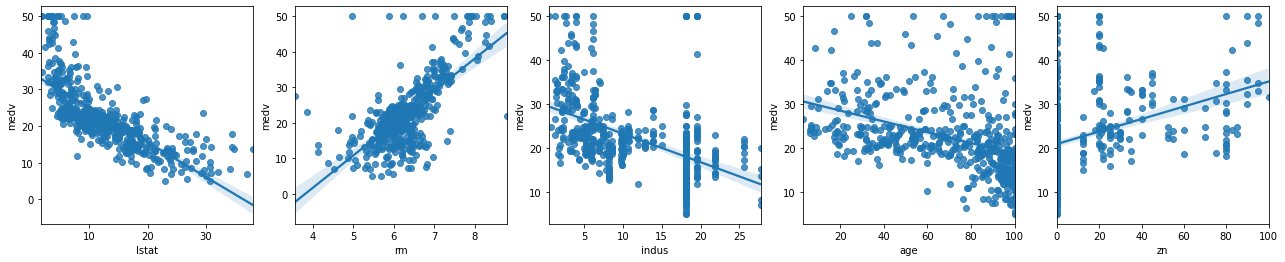

In [51]:
# picked lstat, rm, ptratio, age and zn for plotting
fig, axs = plt.subplots(1, 5, figsize=(22, 4))
lst = ['lstat', 'rm', 'indus', 'age', 'zn']
for i, param in enumerate(lst):
    plt.sca(axs[i])
    sns.regplot(x=param, y='medv', data=boston)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
 Reference: https://www.kaggle.com/c/boston-housing

#### Your response here
1. The plots show either strong negative or positive correlation between the chosen parameters with the housing prices
2. The relationships are according to expectation; e.g.
    - the house price goes up at the increase of the number of rooms per dwelling (`rm`).
    - inversely, the house price goes down at the increase of the proportion of the % lower status population

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<IPython.core.display.Javascript object>

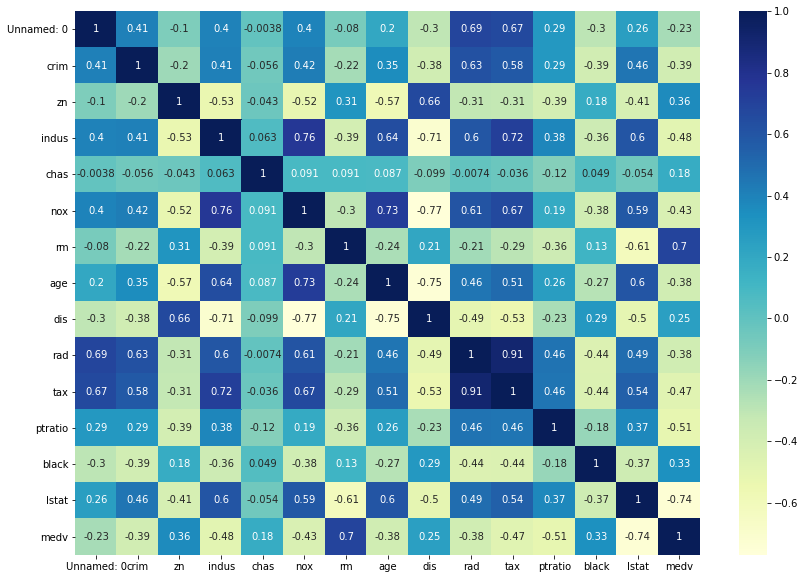

In [48]:
#your code here
# Your plots here
plt.figure(figsize=(14, 10))
b_corr = boston.corr()
sns.heatmap(b_corr, cmap='YlGnBu', annot=True);

#### Significant correlations


#### Response:
The variables that I do not expect to have strong correlation but in fact are strongly correlated with the house prices are:
- `nox`: nitric oxide concentration
- `ptratio`: pupil-teacher ratio

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [56]:
boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [60]:
#your code here
boston.drop(columns='Unnamed: 0', inplace=True)
X = boston.drop(columns='medv')
y = boston['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) 

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [63]:
#your code here
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(max_depth=2)
model2 = RandomForestRegressor(max_depth=4)
model3 = RandomForestRegressor(max_depth=6) 
model4 = RandomForestRegressor(max_depth=8)
model5 = RandomForestRegressor(max_depth=10)

Now, plot the score for each tree on the training set and on the testing set.

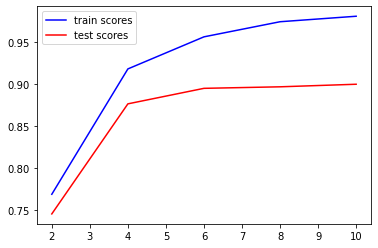

In [75]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
models = [model1, model2, model3, model4, model5]
train_scores = []
test_scores = []
for model in models:
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    train_scores.append(score_train)
    score_test = model.score(X_test, y_test)
    test_scores.append(score_test)
plt.plot(range(2, 12, 2), train_scores, c='b', label='train scores');
plt.plot(range(2, 12, 2), test_scores, c='r', label='test scores');
plt.legend();

What do these results tell you about the effect of the depth of the trees on the performance of the model?


#### Your response here
- It appears that the performance of the model increases with the increase of the depths of the tree on the `train dataset`
- However, this effect increases only slightly from depth 4 to depth 6, which levelled off right after, on the `test dataset`

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

#### Your response here
When the model is trained with a max depth of 1, it suffers from high bias because we obviously make strong assumption here on how the data should be model (i.e. fitted only in 1-level tree). On the other hand, with a max depth of 10, it suffers from high variance because this creates much more levels of the tree to fit the data in, which can lead to overfitting.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [76]:
#your code here
model = RandomForestRegressor(max_depth=6)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8932573179646875

#### Response:
Optimal max_depth is 6. The score of the model is ~ 89%

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [81]:
#your code here
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)

In [78]:
MAE

2.286704517887446

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [79]:
#your code here
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

<IPython.core.display.Javascript object>

In [80]:
RMSE

2.9947354003942896

#### Create a function that calculates  and returns the r2 score as performance metric

In [82]:
#your code here
def r2_metric(y_true, y_pred):
    return r2_score(y_true, y_pred)

#### Calculate the r2 score of the model using the function defined above

In [83]:
#your code here
r2_metric(y_test, y_pred)

0.8932573179646875

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

#### your answer here
The RMSE has the benefit of penalizing large errors. So it is of great use in cases where we want to assess if the built model has large errors (difference between the true and predicted data). In our case here of predicting the house prices, we are not particularly interested in large errors so it is ok to consider all errors to have equal weights. Therefore MAE can be acceptable.

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

#### Your response here
- Obviously the data of 1978 is no longer representative for the current time. It can serve as a good basis for understanding the business but it should not be used to create a model predicting the current time.
- I haven't seen the features of the houses in the dataset. It is really about the features of the neighborhood
- Urban city and rural city have different characteristics and features that might be important for one but not for the others. So the answer is no for the last question.